<a href="https://colab.research.google.com/github/b4lbs/Ceub_IA/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carregando a base de dados
import pandas as pd
dataFrame = pd.read_csv("/content/kc_house_data.csv")
dataFrame.shape

(21613, 21)

In [ ]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

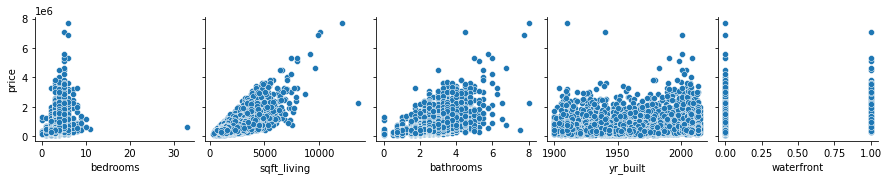

In [ ]:
#Análise de correlação de variáveis
import seaborn as sb
sb.pairplot(dataFrame,
            x_vars=["bedrooms","sqft_living","bathrooms","yr_built","waterfront"],
            y_vars=["price"]
            )

In [ ]:
#Gerar regressão linear simples
#Separando variável dependente da independente
#X é independente e y é dependente
X = dataFrame[["sqft_living"]]
X

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680
...,...
21608,1530
21609,2310
21610,1020
21611,1600


In [ ]:
y = dataFrame[["price"]]
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [ ]:
#Separar base_train e base_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18371, 1), (3242, 1), (18371, 1), (3242, 1))

In [ ]:
#Aplicar regressão linear
from sklearn.linear_model import LinearRegression
objRL = LinearRegression()

In [ ]:
objRL.fit(X_train,y_train)

LinearRegression()

In [ ]:
data = [[1150],[2575],[770],[450]]

objRL.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[275675.47593069],
       [678960.41413172],
       [168132.82574374],
       [ 77570.59400737]])

In [ ]:
y_pred = objRL.predict(X_train)

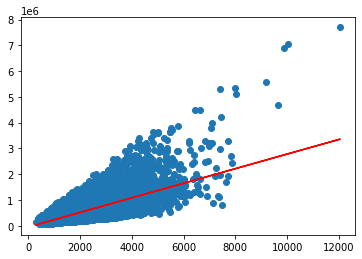

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red")

In [ ]:
#Medindo acurácia do modelo (indicadores MSE e R2)
#MENOR MSE POSSÍVEL E R2 MAIS PRÓXIMO DE 1 (R2>0.7 = BOM)
y_pred_test = objRL.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
print(f'MSE: {mean_squared_error(y_test, y_pred_test)}')
print(f'R2: {r2_score(y_test, y_pred_test)}')

MSE: 66512586164.541214
R2: 0.48677836222957005


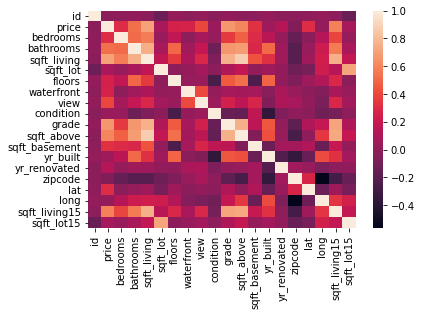

In [ ]:
sb.heatmap(dataFrame.corr())

In [ ]:
#Melhorando o modelo, usando 3 variáveis independetes (sqft_living, grade, bathrooms)
X2 = dataFrame[['sqft_living','grade', 'bathrooms']]
y2 = dataFrame[['price']]

In [ ]:
from sklearn.model_selection import train_test_split
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2, test_size=0.15)
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((18371, 3), (3242, 3), (18371, 1), (3242, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
objRL2 = LinearRegression()

In [ ]:
objRL2.fit(X2_train,y_train)

LinearRegression()

In [ ]:
y2_pred_test = objRL2.predict(X2_test)
y2_pred_test

array([[533869.36520204],
       [539697.23245096],
       [534245.70034948],
       ...,
       [537607.98871421],
       [535030.22414566],
       [544188.22159028]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(f'MSE: {mean_squared_error(y2_test, y2_pred_test)}')
print(f'R2: {r2_score(y2_test,y2_pred_test)}')

MSE: 132754132319.83801
R2: 0.0018028911441702045


In [ ]:
X3 = dataFrame.drop(columns=['id', 'date', 'price'])

In [ ]:
X3


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
y3 = dataFrame[['price']]

In [ ]:
y3

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size= 0.15)

In [ ]:
X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape

((18371, 18), (3242, 18), (18371, 1), (3242, 1))

In [ ]:
from sklearn.linear_model import LinearRegression
objRL3 = LinearRegression()

In [ ]:
objRL3

LinearRegression()

In [ ]:
objRL3.fit(X3_train, y3_train)

LinearRegression()

In [ ]:
y3_pred_test = objRL3.predict(X3_test)

In [ ]:
print(f'R2: {r2_score(y3_test, y3_pred_test)}')
print(f'MSE: {mean_squared_error(y3_test, y3_pred_test)}')

R2: 0.6978306767856196
MSE: 43597278671.07883


In [ ]:
#Criando coluna de preço previsto 
y3_test['price_predict'] = y3_pred_test
y3_test

,price,price_predict
12422,317000.0,3.655937e+05
1682,390000.0,4.319890e+05
2048,545000.0,6.672764e+05
75,832500.0,9.899558e+05
11883,975000.0,1.367762e+06
...,...,...
13537,200000.0,2.819187e+05
12833,599000.0,7.247539e+05
15044,484000.0,5.272089e+05
7661,670000.0,5.981644e+05


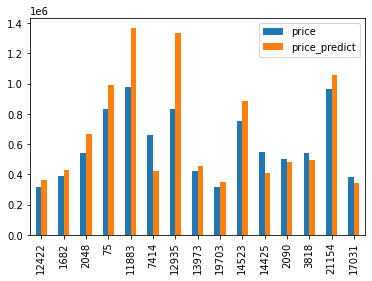

In [ ]:
dfAnalise = y3_test.head(15)
dfAnalise.plot(kind="bar")